# Is it a bird?

## Step 1: Download Images

In [44]:
# Define function
# Search images on the web

from duckduckgo_search import DDGS

def search_images(term, max_images):
    print(f"Searching images for term {term}")
    results = DDGS().images(keywords=term, max_results=max_images)
    return results

In [45]:
# Define function
# Get urls out of search results

from fastcore.all import *

def get_urls_from_ddgs_results(results):
    urls = L(results).itemgot('image')
    return urls

In [46]:
# Define function
# A function to empty a dir (so we can re-download the images).
# This is function/code is provided by ChatGPT-4o

import os
import shutil

def delete_all_files_in_directory(directory):
    try:
        # Check if the directory exists
        if not os.path.exists(directory):
            print(f"The directory {directory} does not exist.")
            return
        
        # List all files in the directory
        files = os.listdir(directory)
        
        for file in files:
            file_path = os.path.join(directory, file)
            
            # Check if it is a file (not a directory)
            if os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Deleted file: {file_path}")
            elif os.path.isdir(file_path):
                # If it's a directory, delete the entire directory
                shutil.rmtree(file_path)
                print(f"Deleted directory: {file_path}")
        
        print("All files have been deleted.")
        
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
# directory_path = 'path_to_your_directory'
# delete_all_files_in_directory(directory_path)

In [47]:
# Define function
# Download from the URL and take a look at the photo
from fastdownload import download_url
from time import sleep

def download_images_from_urls(dir_path, urls):
    
    # clean any existing files in the dir
    delete_all_files_in_directory(dir_path)

    pause_cnt = 0
    paths = []
    for i in range (0, len(urls)):
        n = i+1
        dest = f"{dir_path}/{n}.jpg"
        print(f"Downloading image #{n} to {dest}...")
        try:
            download_url(urls[i], dest, show_progress=False)
            paths.append(dest)
        except:
            print(f"Error while downloading image: {urls[i]}")
            print(exception)
        
        # Pause every 10 searches to avoid over-loading
        pause_cnt = pause_cnt + 1
        if pause_cnt >= 10:
            print("Sleeping for 10s")
            sleep(10)
            pause_cnt = 0
        
    print("Finished downloading.")
    return paths



In [48]:
# Define function
# Function to process images for a category

from fastai.vision.utils import *

def download_images_for(term, max_images=30):
    
    image_dir_path = f"images/{term}"
    
    # Search Images
    results = search_images(f"{term} photos", max_images)
    print(f"Search results obtained with {len(results)} results")
    print("Sample:")
    print(results[0])

    # Get URLs from results
    urls = get_urls_from_ddgs_results(results)
    print(f"Obtained {len(urls)} urls")
    print("Sample:")
    print(urls[0])

    # Download images
    paths = download_images_from_urls(dir_path=image_dir_path, urls=urls)
    print(f"Images downloaded: {len(paths)}")
    print("Sample")
    print(paths[0])

    print(f"Finished downloading images for {term}.")
    return paths


In [49]:
# Define function
# Function to setup training data

def run_download_data(terms, sample_size):
    print(f"Preparing data/images for terms: {terms}")

    # Download/process images
    for t in terms:
        download_images_for(t, max_images=sample_size)

    print(f"Images downloaded.")

In [50]:
# Define Params

terms = ["bird", "forest"]
sample_size = 100

In [51]:
# Call function
# Download data forest

run_download_data(["bird"], sample_size)

Preparing data/images for terms: ['bird']
Searching images for term bird photos
Search results obtained with 100 results
Sample:
{'title': 'Green Bird · Free Stock Photo', 'image': 'https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.Ct8gRWSHnCcLr7ozTKmePAHaIp&pid=Api', 'url': 'https://www.pexels.com/photo/green-bird-1661179/', 'height': 2625, 'width': 2250, 'source': 'Bing'}
Obtained 100 urls
Sample:
https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg
Deleted file: images/bird/8.jpg
Deleted file: images/bird/9.jpg
Deleted file: images/bird/10.jpg
Deleted file: images/bird/4.jpg
Deleted directory: images/bird/.ipynb_checkpoints
Deleted file: images/bird/5.jpg
Deleted file: images/bird/7.jpg
Deleted file: images/bird/6.jpg
Deleted file: images/bird/2.jpg
Deleted file: images/bird/3.jpg
Deleted file: images/bird/1.jpg
All files

In [52]:
# Call function
# Download data forest

run_download_data(["forest"], sample_size)

Preparing data/images for terms: ['forest']
Searching images for term forest photos
Search results obtained with 100 results
Sample:
{'title': 'Wallpaper : sunlight, trees, nature, road, morning, mist, wilderness ...', 'image': 'https://get.wallhere.com/photo/sunlight-trees-forest-nature-road-morning-mist-wilderness-jungle-rainforest-wetland-tree-autumn-woodland-3840x2400-px-habitat-natural-environment-atmospheric-phenomenon-woody-plant-geographical-feature-ecosystem-temperate-coniferous-forest-biome-old-growth-forest-temperate-broadleaf-and-mixed-forest-deciduous-730487.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.Qre2m5rlYXCci5ee6iRVhAHaEo&pid=Api', 'url': 'https://wallhere.com/en/wallpaper/730487', 'height': 2400, 'width': 3840, 'source': 'Bing'}
Obtained 100 urls
Sample:
https://get.wallhere.com/photo/sunlight-trees-forest-nature-road-morning-mist-wilderness-jungle-rainforest-wetland-tree-autumn-woodland-3840x2400-px-habitat-natural-environment-atmospheric-phenomenon-wood

## Step 2: Clean up data

In [53]:
# Define function
# Open one of the images that we just downloaded to ensure it looks good.
from IPython.display import Image, display

def show_image(path):
    print(f"Opening image at {path}")
    display(Image(filename=path, width=50))

In [54]:
# Define function
# Cleanup the downloaded images

from fastai.vision.all import *

def clean_images_for(term):
    image_dir_path = f"images/{term}"

    # Remove any failed-download images
    failed = verify_images(get_image_files(image_dir_path))
    failed.map(Path.unlink)
    print(f"Failed images: {len(failed)}")

    # Resize all the images to a standard size
    print(f"Resizing images...")
    resize_images(image_dir_path, max_size=400, dest=image_dir_path)

    # Display/Open a sample file
    sample_image_path = f"{image_dir_path}/1.jpg"
    print(f"Showing sample file: {sample_image_path}")
    try:
        show_image(sample_image_path)
    except Exception as e:
        print(e)
        print(f"Couldn't display image at {sample_image_path}")

    print(f"Finished processing images for {term}.")
    

In [55]:
# Define function
# Function to setup training data

def run_clean_data(terms):
    print(f"Preparing data/images for terms: {terms}")

    # Download/process images
    for t in terms:
        clean_images_for(t)

    print(f"Images cleaned.")

In [56]:
# Call function
# Clean data

run_clean_data(terms)

Preparing data/images for terms: ['bird', 'forest']
Failed images: 3
Resizing images...
Showing sample file: images/bird/1.jpg
tuple index out of range
Couldn't display image at images/bird/1.jpg
Finished processing images for bird.
Failed images: 2
Resizing images...
Showing sample file: images/forest/1.jpg
tuple index out of range
Couldn't display image at images/forest/1.jpg
Finished processing images for forest.
Images cleaned.


## Step 3: Train the model

In [57]:
# Define function
# Function to train model

from fastai.vision.all import *
from fastai.data.block import DataBlock

def run_train_model(terms, sample_size): 
    # Setup model
    
    # Setup dataloaders
    print(f"Setting up the dataloader...")
    db = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=parent_label,
        item_tfms=[Resize(192, method='squish')]
    )
    bs = (sample_size)+len(terms)
    print(f"bs={bs}")
    dls = db.dataloaders(Path('images'), bs=32)
    dls.show_batch(max_n=10)

    # Download and finetune model
    print(f"Downloading & Finetuning model...")
    learn = vision_learner(dls, resnet18, metrics=error_rate)
    print(f"Model downloaded.")
    
    print(f"Model finetuning...")
    learn.fine_tune(3)
    print(f"Model finetuned.")

    return learn


Setting up the dataloader...
bs=102
Model downloaded.
Model finetuning...
epoch     train_loss  valid_loss  error_rate  time    
0         0.722022    0.444274    0.236842    00:01                                    
epoch     train_loss  valid_loss  error_rate  time    
0         0.052373    0.014270    0.000000    00:01                                    
1         0.028485    0.002095    0.000000    00:01                                    
2         0.019034    0.000362    0.000000    00:01                                    
Model finetuned.


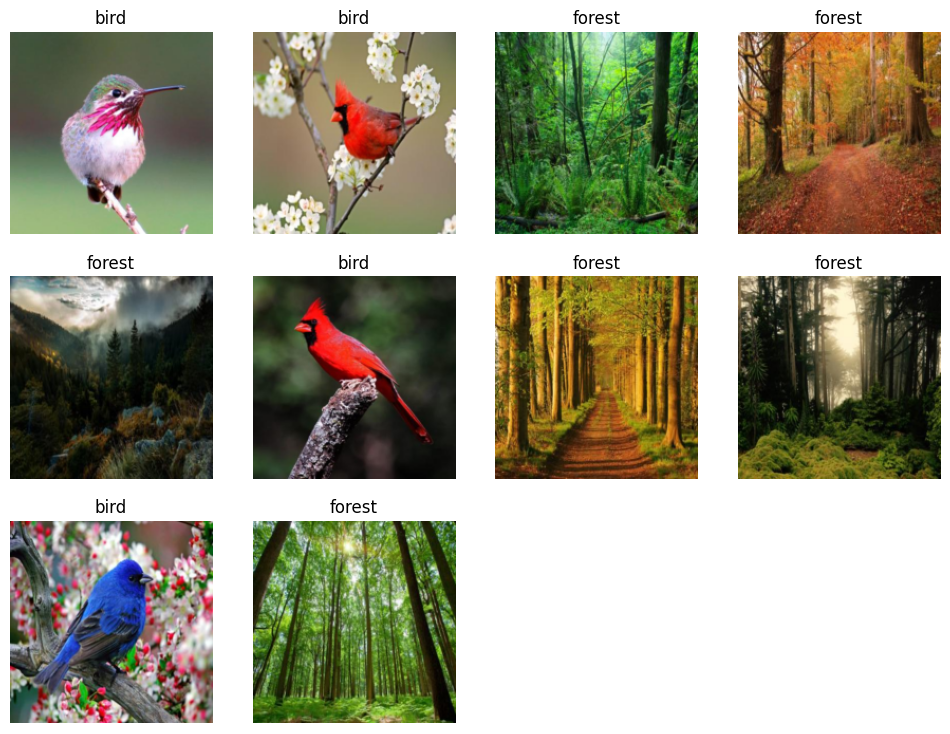

In [58]:
# Call function
# Train model

learn = run_train_model(terms, sample_size)

Test the model with a picture.

In [59]:
category, _, probs = learn.predict(PILImage.create("test_bird.jpg"))
print(f"This is a: {category}")
print(f"Probability it's a {category}: {probs[0]:.4f}")

This is a: bird                                                      
Probability it's a bird: 0.9999


In [60]:
category, _, probs = learn.predict(PILImage.create("test_forest.jpg"))
print(f"This is a: {category}")
print(f"Probability it's a {category}: {probs}")

This is a: forest                                                    
Probability it's a forest: tensor([3.4423e-05, 9.9997e-01])


## Finish

In [61]:
learn.export("trained_model.pkl")